<a href="https://colab.research.google.com/github/wayne1123/Topic/blob/master/PCA_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCA with Pytorch

Date: 2nd July



#### Basic Idea

PCA(Principle Component Analysis) is to find the vectors which explain the largest variance of the original data.

#### Procedures

* Centering the matrix
* Find the largest eigenvectors / eigenvalues -> To do that, we need to decompose the matrix into SVD (through torch.svd)
* Then, get the largest eigenvalues



#### Data Set: MNIST 

In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32').reshape(-1, 784) / 255
x_test = x_test.astype('float32').reshape(-1, 784) / 255

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class PCA(nn.Module):
  """
  Taking the numpy input and 
  converting them into PyTorch / Computing the eigenvectors
  Getting back to them by Numpy
  """
  def __init__(self, X, y):
    super(PCA, self).__init__()
    self.X = self.centering(X)
    self.y = torch.from_numpy(y.copy())
    
  def centering(self, X):
    X = torch.from_numpy(X.copy())
    return X - torch.mean(X)
    
  def forward(self, label, k=3):
    """
    label : the number of MNIST digit that you are trying to decompose
    k: Up to kth largest eigenvectors
    """
    data = self.X[self.y==label]
    u, s, v = torch.svd(data)
    return v[:,:k].cpu().numpy()
  
  

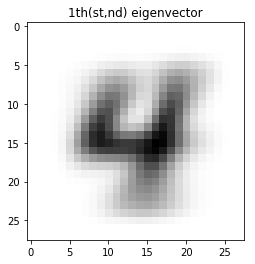

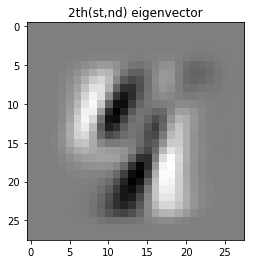

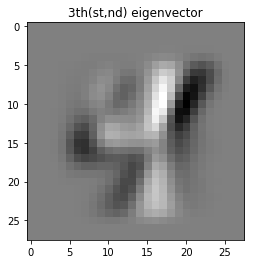

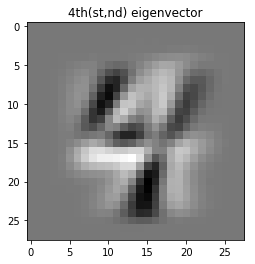

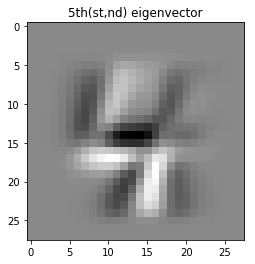

In [112]:
RANGE=5
LABEL=4
f = PCA(x_train, y_train)
f_pca = f(LABEL, RANGE)
for k in range(RANGE):
  plt.imshow(f_pca[:,k].reshape(28,28), cmap='gray')
  plt.title(str(k+1) + "th(st,nd) eigenvector")
  plt.show()

* You can see many over lapping numbers after the largest eigenvector